<a href="https://colab.research.google.com/github/Mmavr/Mavrikou_teliki-ergasia/blob/main/Mavrikiou_edde2_teliki_ergasia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Q1

In [ ]:
import requests
from bs4 import BeautifulSoup

base_url = "https://www.iefimerida.gr"
covid_url = base_url + "/tag/covid-19"

headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0"}
num_pages = 60

links = []
for page in range(0, num_pages):
    html = requests.get(covid_url, params={'page': page}, headers=headers)
    soup = BeautifulSoup(html.content, "html.parser")
    for link in soup.select("a.article-link"):
        links.append(link["href"])

print("Number of article links:", len(links))
print(links[:5])

Number of article links: 601
['/kosmos/hores-ypohreotikos-emboliasmos-covid-19', '/ygeia/posi-prostasia-apo-embolia-covid-19-kata-parallagis-delta', '/ellada/psifiako-pistopoiitiko-pos-tha-leitoyrgei-i-efarmogi', '/ygeia/poy-hapia-arthritida-kortikosteroeidi-thanato-covid-19', '/kosmos/belgio-prasino-fos-emboliasmo-kata-covid-19-efibon']


In [ ]:
from datetime import datetime

data = list()
for link in links:
    try:
        html = requests.get(base_url + link, headers=headers)
        soup = BeautifulSoup(html.content, "html.parser")
        data.append({
            "link": link.split('/')[2],
            "category": link.split('/')[1],
            "date": datetime.strptime(
                soup.select("time.time")[0].text.strip(), '%d/%m/%Y  %H:%M'),
            "title": soup.select("h1")[0].text,
            "text": soup.select("div.field--name-body")[0].text,
            "tags": [t.text for t in soup.select('div.tags')[0].select('a')],
            "author": soup.select("div.author")[0].select("a")[0].text
        })
    except ValueError:
        continue

print("Number of articles scraped:", len(data))

Number of articles scraped: 595


### Q2

In [ ]:
import pandas as pd

article_df = pd.DataFrame(data)
article_df

,link,category,date,title,text,tags,author
0,hores-ypohreotikos-emboliasmos-covid-19,kosmos,2021-07-10 20:41:00,Κορωνοϊός: Σε αυτές τις χώρες είναι υποχρεωτικ...,\nΜε την παραλλαγή Δέλτα του κορωνοϊού να καλπ...,"[εμβολιασμός, covid-19, χώρες]",NEWSROOM IEFIMERIDA.GR
1,posi-prostasia-apo-embolia-covid-19-kata-paral...,ygeia,2021-07-09 10:35:00,Να πόση προστασία μας προσφέρουν τα εμβόλια γι...,\nΗ λίαν λοιμογόνος παραλλαγή Δέλτα εξαπλώνετα...,"[εμβόλιο, covid-19, παραλλαγή, αποτελεσματικότ...",NEWSROOM IEFIMERIDA.GR
2,psifiako-pistopoiitiko-pos-tha-leitoyrgei-i-ef...,ellada,2021-07-08 07:15:00,Ψηφιακό πιστοποιητικό: Πώς θα λειτουργεί η εφα...,\nΈτοιμη και διαθέσιμη από τις 15 Ιουλίου θα ε...,"[ΨΗΦΙΑΚΟ ΠΙΣΤΟΠΟΙΗΤΙΚΟ, covid-19, Κορωνοϊός, ε...",NEWSROOM IEFIMERIDA.GR
3,poy-hapia-arthritida-kortikosteroeidi-thanato-...,ygeia,2021-07-06 22:19:00,ΠΟΥ: Αυτά τα χάπια για την αρθρίτιδα και κορτι...,\nΟ ΠΟΥ συνέστησε σήμερα τη χρήση των φαρμάκων...,"[ΠΟΥ, χάπια, αρθρίτιδα, θάνατος, covid-19]",NEWSROOM IEFIMERIDA.GR
4,belgio-prasino-fos-emboliasmo-kata-covid-19-ef...,kosmos,2021-07-06 14:55:00,Βέλγιο: «Πράσινο φως» για τον εμβολιασμό κατά ...,\nΘετική εισήγηση για τον εμβολιασμό κατά της ...,"[Βέλγιο, εμβολιασμός, έφηβοι, covid-19, Κορωνο...",NEWSROOM IEFIMERIDA.GR
...,...,...,...,...,...,...,...
590,enosi-eisaggeleon-anaboles-dikastiria-koronoios,ellada,2020-11-24 12:50:00,Ενωση Εισαγγελέων Ελλάδος: Πληθαίνουν οι αναβο...,\nΗ συνέχιση της λειτουργίας των ποινικών δικα...,"[Ένωση Εισαγγελέων Ελλάδος, εισαγγελείς, Κορων...",NEWSROOM IEFIMERIDA.GR
591,kellas-polemo-kata-covid19-den-perisseyei-kaneis,politiki,2020-11-24 08:45:00,«Στον πόλεμο κατά του Covid-19 δεν περισσεύει ...,\n«Ιερό» καθήκον απέναντι στην πατρίδα και του...,"[Χρήστος Κέλλας, Κορωνοϊός, βουλευτής, ΝΔ, για...",ΕΙΡΗΝΗ ΧΑΤΖΟΓΛΟΥ
592,koronoios-paidia-pernane-ipia-noso-ereyna,ygeia,2020-11-23 23:20:00,Κορωνοϊός: Τα περισσότερα παιδιά περνάνε ήπια ...,\nΗ μεγάλη πλειονότητα των παιδιών που μολύνον...,"[παιδιά, Κορωνοϊός, ασθένεια, covid-19]",NEWSROOM IEFIMERIDA.GR
593,koronoios-1388-kroysmata-eody-23-11-anakoinosi,ellada,2020-11-23 18:06:00,Κορωνοϊός: 1.388 νέα κρούσματα -549 διασωληνωμ...,\nΟ ΕΟΔΥ ανακοίνωσε 1.388 νέα κρούσματα κορωνο...,"[Κορωνοϊός, κρούσματα, νεκροί, ΕΟΔΥ, ανακοίνωσ...",NEWSROOM IEFIMERIDA.GR


### Q3

In [ ]:
def clean_title(title):
    title = " ".join(title.split())
    return title

def clean_text(text):
    text = " ".join(text.split())
    text = text.replace("ΤΟ ΑΡΘΡΟ ΣΥΝΕΧΙΖΕΙ ΜΕΤΑ ΤΗΝ ΔΙΑΦΗΜΙΣΗ", " ")
    text = text.split("ΟΛΕΣ ΟΙ ΕΙΔΗΣΕΙΣ")[0]
    text = text.split("Ακολουθήστε το iefimerida.gr")[0]
    text = text.split("ΣΧΕΤΙΚΑ ΑΡΘΡΑ ΚΟΣΜΟΣ")[0]
    text = text.split("ΣΧΕΤΙΚΑ ΑΡΘΡΑ ΕΛΛΑΔΑ")[0]
    text = text.split("ΣΧΕΤΙΚΑ ΑΡΘΡΑ ΥΓΕΙΑ")[0]
    text = " ".join(text.split())
    return text

def clean_author(text):
    text = text.replace("Επιμέλεια: ", "")
    text = " ".join(text.split())
    return text


article_df = article_df.dropna().reset_index(drop=True)
article_df["title"] = article_df["title"].apply(clean_title)
article_df["text"] = article_df["text"].apply(clean_text)
article_df["author"] = article_df["author"].apply(clean_author)
article_df.head()

,link,category,date,title,text,tags,author
0,hores-ypohreotikos-emboliasmos-covid-19,kosmos,2021-07-10 20:41:00,Κορωνοϊός: Σε αυτές τις χώρες είναι υποχρεωτικ...,Με την παραλλαγή Δέλτα του κορωνοϊού να καλπάζ...,"[εμβολιασμός, covid-19, χώρες]",NEWSROOM IEFIMERIDA.GR
1,posi-prostasia-apo-embolia-covid-19-kata-paral...,ygeia,2021-07-09 10:35:00,Να πόση προστασία μας προσφέρουν τα εμβόλια γι...,Η λίαν λοιμογόνος παραλλαγή Δέλτα εξαπλώνεται ...,"[εμβόλιο, covid-19, παραλλαγή, αποτελεσματικότ...",NEWSROOM IEFIMERIDA.GR
2,psifiako-pistopoiitiko-pos-tha-leitoyrgei-i-ef...,ellada,2021-07-08 07:15:00,Ψηφιακό πιστοποιητικό: Πώς θα λειτουργεί η εφα...,Έτοιμη και διαθέσιμη από τις 15 Ιουλίου θα είν...,"[ΨΗΦΙΑΚΟ ΠΙΣΤΟΠΟΙΗΤΙΚΟ, covid-19, Κορωνοϊός, ε...",NEWSROOM IEFIMERIDA.GR
3,poy-hapia-arthritida-kortikosteroeidi-thanato-...,ygeia,2021-07-06 22:19:00,ΠΟΥ: Αυτά τα χάπια για την αρθρίτιδα και κορτι...,Ο ΠΟΥ συνέστησε σήμερα τη χρήση των φαρμάκων A...,"[ΠΟΥ, χάπια, αρθρίτιδα, θάνατος, covid-19]",NEWSROOM IEFIMERIDA.GR
4,belgio-prasino-fos-emboliasmo-kata-covid-19-ef...,kosmos,2021-07-06 14:55:00,Βέλγιο: «Πράσινο φως» για τον εμβολιασμό κατά ...,Θετική εισήγηση για τον εμβολιασμό κατά της Co...,"[Βέλγιο, εμβολιασμός, έφηβοι, covid-19, Κορωνο...",NEWSROOM IEFIMERIDA.GR


### Q4

In [ ]:
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

d
my_stopwords = stopwords.words("greek") + [
    "τη", "της", "την", "το", "του", "τον", "τους", "τις", "τα",
    "αυτός", "αυτή", "αυτό", "αυτά", "στον", "στη", "στην", "στο",
    "στους", "στις", "στα", "οποίος", "οποία", "οποίο", "έχει", "έχουν",
    "μία", "μια", "ένα", "μας", "ότι", "από", "είναι", "ή", "όπως",
    "αλλά", "ενώ", "καθώς"]


def text_preprocess(text):
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = text.lower()
    text = ' '.join([word for word in text.split() if
                     word not in my_stopwords])
    return text


article_df["preproc_text"] = article_df["text"].apply(text_preprocess)
article_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,link,category,date,title,text,tags,author,preproc_text
0,hores-ypohreotikos-emboliasmos-covid-19,kosmos,2021-07-10 20:41:00,Κορωνοϊός: Σε αυτές τις χώρες είναι υποχρεωτικ...,Με την παραλλαγή Δέλτα του κορωνοϊού να καλπάζ...,"[εμβολιασμός, covid-19, χώρες]",NEWSROOM IEFIMERIDA.GR,παραλλαγή δέλτα κορωνοϊού καλπάζει ανά υφήλιο ...
1,posi-prostasia-apo-embolia-covid-19-kata-paral...,ygeia,2021-07-09 10:35:00,Να πόση προστασία μας προσφέρουν τα εμβόλια γι...,Η λίαν λοιμογόνος παραλλαγή Δέλτα εξαπλώνεται ...,"[εμβόλιο, covid-19, παραλλαγή, αποτελεσματικότ...",NEWSROOM IEFIMERIDA.GR,λίαν λοιμογόνος παραλλαγή δέλτα εξαπλώνεται σα...
2,psifiako-pistopoiitiko-pos-tha-leitoyrgei-i-ef...,ellada,2021-07-08 07:15:00,Ψηφιακό πιστοποιητικό: Πώς θα λειτουργεί η εφα...,Έτοιμη και διαθέσιμη από τις 15 Ιουλίου θα είν...,"[ΨΗΦΙΑΚΟ ΠΙΣΤΟΠΟΙΗΤΙΚΟ, covid-19, Κορωνοϊός, ε...",NEWSROOM IEFIMERIDA.GR,έτοιμη διαθέσιμη 15 ιουλίου εφαρμογή επαλήθευσ...
3,poy-hapia-arthritida-kortikosteroeidi-thanato-...,ygeia,2021-07-06 22:19:00,ΠΟΥ: Αυτά τα χάπια για την αρθρίτιδα και κορτι...,Ο ΠΟΥ συνέστησε σήμερα τη χρήση των φαρμάκων A...,"[ΠΟΥ, χάπια, αρθρίτιδα, θάνατος, covid-19]",NEWSROOM IEFIMERIDA.GR,συνέστησε σήμερα χρήση φαρμάκων actemra εταιρε...
4,belgio-prasino-fos-emboliasmo-kata-covid-19-ef...,kosmos,2021-07-06 14:55:00,Βέλγιο: «Πράσινο φως» για τον εμβολιασμό κατά ...,Θετική εισήγηση για τον εμβολιασμό κατά της Co...,"[Βέλγιο, εμβολιασμός, έφηβοι, covid-19, Κορωνο...",NEWSROOM IEFIMERIDA.GR,θετική εισήγηση εμβολιασμό covid19 εφήβων 1215...


### Q5

In [ ]:
article_df["month"] = pd.DatetimeIndex(article_df["date"]).month
article_df["year"] = pd.DatetimeIndex(article_df["date"]).year

article_df["num_words"] = article_df["text"].apply(lambda x: len(x.split()))
article_df["uniq_words"] = article_df["text"].str.split().apply(lambda x: len(set(x)))

article_df.head()

,link,category,date,title,text,tags,author,preproc_text,month,year,num_words,uniq_words
0,hores-ypohreotikos-emboliasmos-covid-19,kosmos,2021-07-10 20:41:00,Κορωνοϊός: Σε αυτές τις χώρες είναι υποχρεωτικ...,Με την παραλλαγή Δέλτα του κορωνοϊού να καλπάζ...,"[εμβολιασμός, covid-19, χώρες]",NEWSROOM IEFIMERIDA.GR,παραλλαγή δέλτα κορωνοϊού καλπάζει ανά υφήλιο ...,7,2021,838,444
1,posi-prostasia-apo-embolia-covid-19-kata-paral...,ygeia,2021-07-09 10:35:00,Να πόση προστασία μας προσφέρουν τα εμβόλια γι...,Η λίαν λοιμογόνος παραλλαγή Δέλτα εξαπλώνεται ...,"[εμβόλιο, covid-19, παραλλαγή, αποτελεσματικότ...",NEWSROOM IEFIMERIDA.GR,λίαν λοιμογόνος παραλλαγή δέλτα εξαπλώνεται σα...,7,2021,635,303
2,psifiako-pistopoiitiko-pos-tha-leitoyrgei-i-ef...,ellada,2021-07-08 07:15:00,Ψηφιακό πιστοποιητικό: Πώς θα λειτουργεί η εφα...,Έτοιμη και διαθέσιμη από τις 15 Ιουλίου θα είν...,"[ΨΗΦΙΑΚΟ ΠΙΣΤΟΠΟΙΗΤΙΚΟ, covid-19, Κορωνοϊός, ε...",NEWSROOM IEFIMERIDA.GR,έτοιμη διαθέσιμη 15 ιουλίου εφαρμογή επαλήθευσ...,7,2021,170,115
3,poy-hapia-arthritida-kortikosteroeidi-thanato-...,ygeia,2021-07-06 22:19:00,ΠΟΥ: Αυτά τα χάπια για την αρθρίτιδα και κορτι...,Ο ΠΟΥ συνέστησε σήμερα τη χρήση των φαρμάκων A...,"[ΠΟΥ, χάπια, αρθρίτιδα, θάνατος, covid-19]",NEWSROOM IEFIMERIDA.GR,συνέστησε σήμερα χρήση φαρμάκων actemra εταιρε...,7,2021,428,253
4,belgio-prasino-fos-emboliasmo-kata-covid-19-ef...,kosmos,2021-07-06 14:55:00,Βέλγιο: «Πράσινο φως» για τον εμβολιασμό κατά ...,Θετική εισήγηση για τον εμβολιασμό κατά της Co...,"[Βέλγιο, εμβολιασμός, έφηβοι, covid-19, Κορωνο...",NEWSROOM IEFIMERIDA.GR,θετική εισήγηση εμβολιασμό covid19 εφήβων 1215...,7,2021,371,240


### Q6

Text(0.5, 0, 'Number of Words')

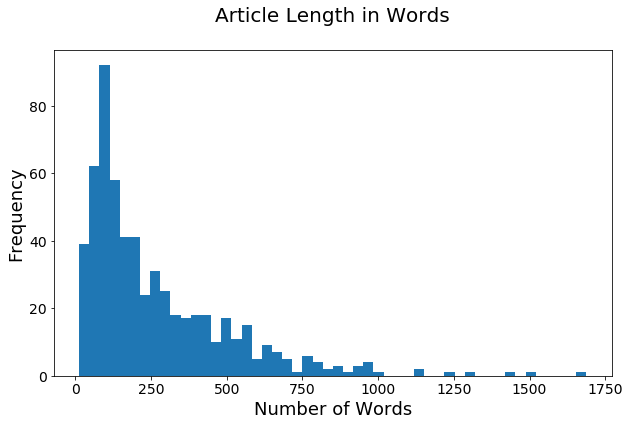

In [ ]:
ax = article_df['num_words'].plot(kind='hist', bins=50, fontsize=14, figsize=(10, 6))
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18)

Text(0.5, 0, 'Number of Unique Words')

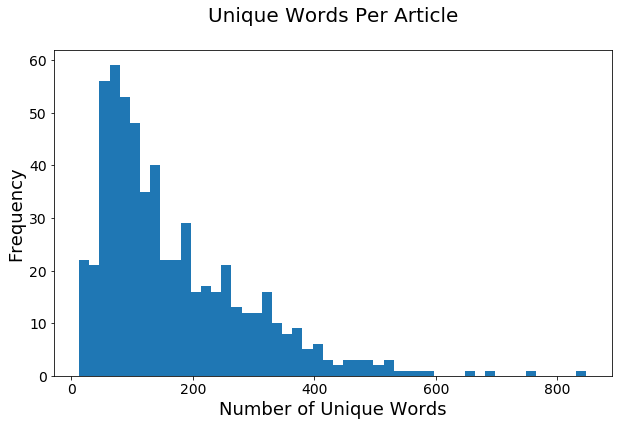

In [ ]:
ax = article_df['uniq_words'].plot(kind='hist', bins=50, fontsize=14, figsize=(10, 6))
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18)

### Q7

(-0.5, 1999.5, 999.5, -0.5)

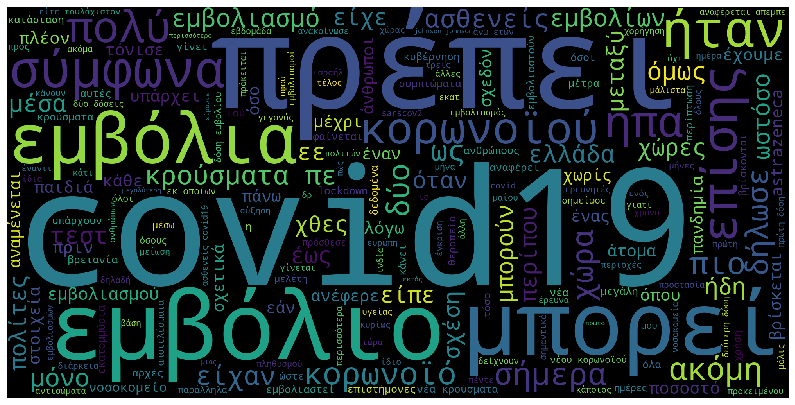

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(
    background_color="black", width=2000, height=1000).generate(
    ' '.join(article_df["preproc_text"]))

plt.figure(figsize=(14, 8))
plt.imshow(wc)
plt.axis("off")

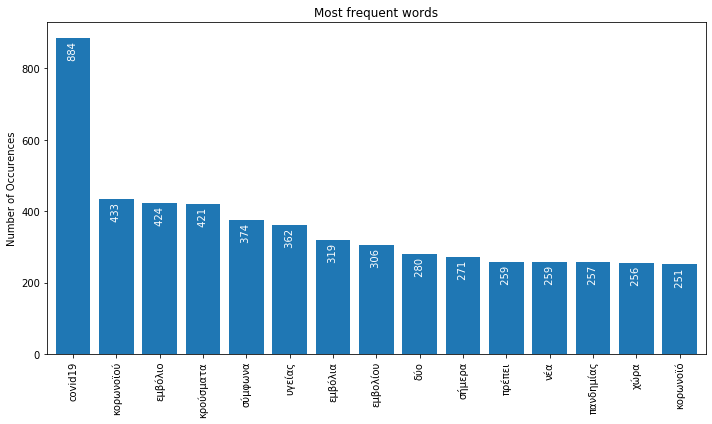

In [ ]:
from collections import Counter


words = " ".join(article_df["preproc_text"]).split()
counter = Counter(words)
y = [count for word, count in counter.most_common(15)]
x = [word for word, count in counter.most_common(15)]

plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.title("Most frequent words")
plt.ylabel("Number of Occurences")
plt.xticks(rotation=90)
for i, (word, count) in enumerate(counter.most_common(15)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top', color='white')
plt.xlim(-0.6, len(x)-0.4)
plt.tight_layout()
plt.show()

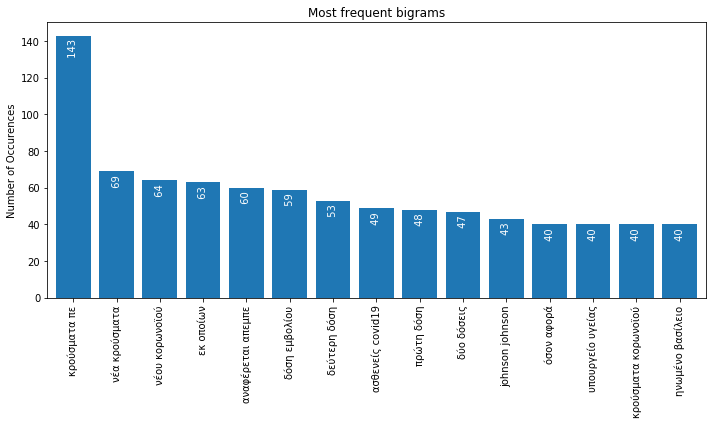

In [ ]:
import nltk

bgrms = list(nltk.bigrams(" ".join(article_df["preproc_text"]).split()))
counter = Counter(bgrms)
y = [count for bgrm, count in counter.most_common(15)]
x = [" ".join(bgrm) for bgrm, count in counter.most_common(15)]

plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.title("Most frequent bigrams")
plt.ylabel("Number of Occurences")
plt.xticks(rotation=90)
for i, (bgrm, count) in enumerate(counter.most_common(15)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top', color='white')
plt.xlim(-0.6, len(x)-0.4)
plt.tight_layout()
plt.show()

### Q9

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)

emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna().reset_index(drop=True)

emolex_df.head()

NameError: ignored

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(analyzer='word', vocabulary=emolex_df.word, 
                      strip_accents='unicode', ngram_range=(1, 2))

matrix = vec.fit_transform(article_df["text"])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

In [ ]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']
negative_words = emolex_df[emolex_df.Negative == 1]['word']

anger_words = emolex_df[emolex_df.Anger == 1]['word']
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']
fear_words = emolex_df[emolex_df.Fear == 1]['word']
joy_words = emolex_df[emolex_df.Joy == 1]['word']
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
article_df['positivity'] = wordcount_df[positive_words].sum(axis=1)
article_df['negativity'] = wordcount_df[negative_words].sum(axis=1)

article_df['anger'] = wordcount_df[anger_words].sum(axis=1)
article_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
article_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)
article_df['fear'] = wordcount_df[fear_words].sum(axis=1)
article_df['joy'] = wordcount_df[joy_words].sum(axis=1)
article_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)
article_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)
article_df['trust'] = wordcount_df[trust_words].sum(axis=1)

article_df = article_df.fillna(0)
article_df.head()

### Q8

In [ ]:

article_df = article_df.set_index('date')
article_df.head()

,link,category,title,text,tags,author,preproc_text,month,year,num_words,...,positivity,negativity,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
date,,,,,,,,,,,,,,,,,,,,,
2021-07-09 10:35:00,posi-prostasia-apo-embolia-covid-19-kata-paral...,ygeia,Να πόση προστασία μας προσφέρουν τα εμβόλια γι...,Η λίαν λοιμογόνος παραλλαγή Δέλτα εξαπλώνεται ...,"[εμβόλιο, covid-19, παραλλαγή, αποτελεσματικότ...",NEWSROOM IEFIMERIDA.GR,λίαν λοιμογόνος παραλλαγή δέλτα εξαπλώνεται σα...,7,2021,635,...,40,7,6,2,6,2,2,0,0,9
2021-07-08 07:15:00,psifiako-pistopoiitiko-pos-tha-leitoyrgei-i-ef...,ellada,Ψηφιακό πιστοποιητικό: Πώς θα λειτουργεί η εφα...,Έτοιμη και διαθέσιμη από τις 15 Ιουλίου θα είν...,"[ΨΗΦΙΑΚΟ ΠΙΣΤΟΠΟΙΗΤΙΚΟ, covid-19, Κορωνοϊός, ε...",NEWSROOM IEFIMERIDA.GR,έτοιμη διαθέσιμη 15 ιουλίου εφαρμογή επαλήθευσ...,7,2021,170,...,10,5,4,1,5,2,1,1,1,5
2021-07-06 22:19:00,poy-hapia-arthritida-kortikosteroeidi-thanato-...,ygeia,ΠΟΥ: Αυτά τα χάπια για την αρθρίτιδα και κορτι...,Ο ΠΟΥ συνέστησε σήμερα τη χρήση των φαρμάκων A...,"[ΠΟΥ, χάπια, αρθρίτιδα, θάνατος, covid-19]",NEWSROOM IEFIMERIDA.GR,συνέστησε σήμερα χρήση φαρμάκων actemra εταιρε...,7,2021,428,...,29,9,2,4,3,5,1,6,1,6
2021-07-06 14:55:00,belgio-prasino-fos-emboliasmo-kata-covid-19-ef...,kosmos,Βέλγιο: «Πράσινο φως» για τον εμβολιασμό κατά ...,Θετική εισήγηση για τον εμβολιασμό κατά της Co...,"[Βέλγιο, εμβολιασμός, έφηβοι, covid-19, Κορωνο...",NEWSROOM IEFIMERIDA.GR,θετική εισήγηση εμβολιασμό covid19 εφήβων 1215...,7,2021,371,...,21,13,8,7,5,5,0,4,0,8
2021-07-05 23:06:00,aystiroi-eleghoi-tsoyhtera-prostima-gia-paraba...,politiki,Αυστηροί έλεγχοι και τσουχτερά πρόστιμα για πα...,Το επιχειρησιακό σχέδιο με αντικείμενο τους ελ...,"[μέτρα, έλεγχοι, covid-19, κυρώσεις, ψυχαγωγία...",NEWSROOM IEFIMERIDA.GR,επιχειρησιακό σχέδιο αντικείμενο ελέγχους τήρη...,7,2021,193,...,11,3,2,3,0,2,0,1,1,1


### Q10

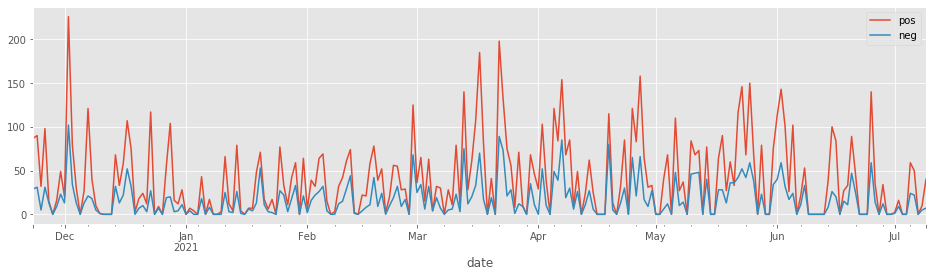

In [ ]:
plt.style.use('ggplot')

ax = article_df['positivity'].resample('D').sum().plot(
    figsize=(16, 4), label='pos')
article_df['negativity'].resample('D').sum().plot(
    figsize=(16, 4), ax=ax, label='neg').legend()

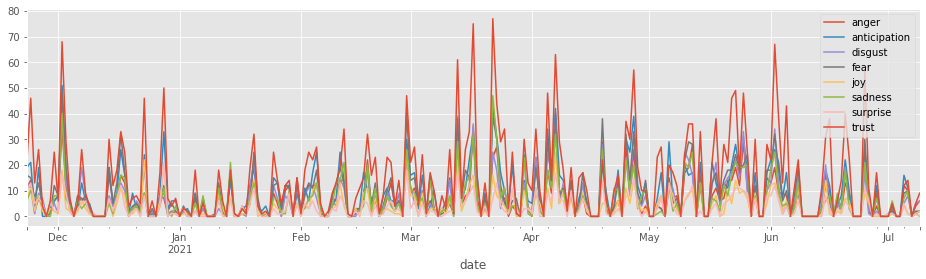

In [ ]:
ax = article_df['anger'].resample('D').sum().plot(
    figsize=(16, 4), label='anger')
article_df['anticipation'].resample('D').sum().plot(
    figsize=(16, 4), ax=ax, label='anticipation')
article_df['disgust'].resample('D').sum().plot(
    figsize=(16, 4), ax=ax, label='disgust')
article_df['fear'].resample('D').sum().plot(
    figsize=(16, 4), ax=ax, label='fear')
article_df['joy'].resample('D').sum().plot(
    figsize=(16, 4), ax=ax, label='joy')
article_df['sadness'].resample('D').sum().plot(
    figsize=(16, 4), ax=ax, label='sadness')
article_df['surprise'].resample('D').sum().plot(
    figsize=(16, 4), ax=ax, label='surprise')
article_df['trust'].resample('D').sum().plot(
    figsize=(16, 4), ax=ax, label='trust').legend()

### Q11

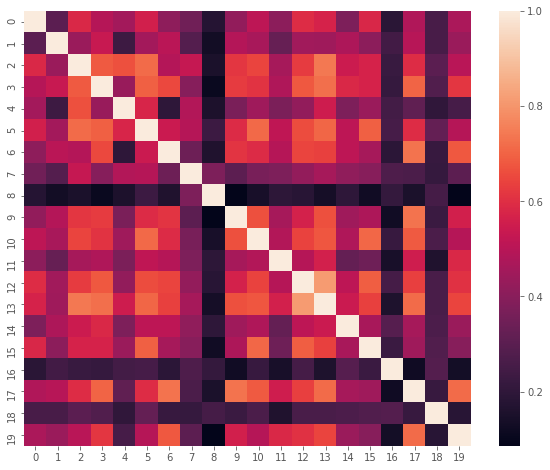

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns


plt.figure(figsize = (10, 8))
ax = sns.heatmap(cosine_similarity(wordcount_df.head(20), wordcount_df.head(20)))
plt.show()